In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from numpy import asarray
import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,GlobalAveragePooling2D
import warnings
warnings.filterwarnings("ignore")

Data Preprocessing

In [3]:
directory = "/kaggle/input/dlcv-dataset1/Revitsone-5classes/"
folders = ["other_activities" , "safe_driving" , "talking_phone" , "texting_phone" , "turning", "sleepy"]
other_activities_img = []
safe_driving_img = []
talking_phone_img = []
texting_phone_img = []
turning_img = []
sleepy_img = []
for imgother in os.listdir(directory + folders[0]):
     if imgother.endswith(".jpg") or imgother.endswith(".png"): 
            other_activities_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/other_activities",imgother))
            
for imgsafe in os.listdir(directory + folders[1]):
     if imgsafe.endswith(".jpg") or imgsafe.endswith(".png"): 
            safe_driving_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/safe_driving",imgsafe))
            
for imgtalk in os.listdir(directory + folders[2]):
     if imgtalk.endswith(".jpg") or imgtalk.endswith(".png"): 
            talking_phone_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/talking_phone",imgtalk))
for imgtext in os.listdir(directory + folders[3]):
     if imgtext.endswith(".jpg") or imgtext.endswith(".png"): 
            texting_phone_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/texting_phone",imgtext))
            
for imgturn in os.listdir(directory + folders[4]):
     if imgturn.endswith(".jpg") or imgturn.endswith(".png"): 
            turning_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/turning",imgturn))

for imgsleep in os.listdir(directory + folders[5]):
    if imgsleep.endswith(".jpg") or imgturn.endswith(".png"):
        sleepy_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/sleepy", imgsleep))

In [4]:
def detect_JPG_PNG(path , name):
    JPG = []
    PNG = []
    for img in path : 
        
            if img.split('.')[1] == 'jpg':
                JPG.append(img)
            else:
                PNG.append(img)
                
    print(f'The folder name is : {name}')
    print(f'The number of all images : {len(path)}')
    print(f'The number of images with jpg format is : {len(JPG)}')
    print(f'The number of images with png format is : {len(PNG)}')

In [5]:
detect_JPG_PNG(path = other_activities_img, name='other activities')
print("\n")
detect_JPG_PNG(path = safe_driving_img, name='safe_driving')
print("\n")
detect_JPG_PNG(path = talking_phone_img  , name = 'talking_phone')
print("\n")
detect_JPG_PNG(path = texting_phone_img , name = 'texting')
print("\n")
detect_JPG_PNG(path = turning_img  , name = 'turning')
print("\n")
detect_JPG_PNG(path = sleepy_img  , name = 'sleepy')

The folder name is : other activities
The number of all images : 2101
The number of images with jpg format is : 2060
The number of images with png format is : 41


The folder name is : safe_driving
The number of all images : 2203
The number of images with jpg format is : 2179
The number of images with png format is : 24


The folder name is : talking_phone
The number of all images : 2169
The number of images with jpg format is : 2145
The number of images with png format is : 24


The folder name is : texting
The number of all images : 2203
The number of images with jpg format is : 2189
The number of images with png format is : 14


The folder name is : turning
The number of all images : 2063
The number of images with jpg format is : 2002
The number of images with png format is : 61


The folder name is : sleepy
The number of all images : 2328
The number of images with jpg format is : 2304
The number of images with png format is : 24


In [6]:
defect_images_other_activities = ['img_13625.jpg' ,'img_20398.jpg']
defect_images_turning = ['img_8771.jpg' , 'img_62337.jpg' , 'img_67523.jpg' , 'img_70552.jpg','img_84605.jpg' , 'img_101434.jpg']

print(f'The number of flawed images in other activities folder is : {len(defect_images_other_activities)}')
print(f'The number of flawed images in turning folder is : {len(defect_images_turning)}')
print('--'*20)

for img in defect_images_other_activities :
    print('Images from : other_activities\n')
    remove_img = '/kaggle/input/dlcv-dataset1/Revitsone-5classes/other_activities/' + img
    print(f'file which has been deleted is : {remove_img}')
    other_activities_img.remove(remove_img)

print('--' * 40 )
for img in defect_images_turning :
    print('Images from : turning\n')
    remove_img = '/kaggle/input/dlcv-dataset1/Revitsone-5classes/turning/' + img
    print(f'file which has been deleted is : {remove_img}')
    turning_img.remove(remove_img)

The number of flawed images in other activities folder is : 2
The number of flawed images in turning folder is : 6
----------------------------------------
Images from : other_activities

file which has been deleted is : /kaggle/input/dlcv-dataset1/Revitsone-5classes/other_activities/img_13625.jpg
Images from : other_activities

file which has been deleted is : /kaggle/input/dlcv-dataset1/Revitsone-5classes/other_activities/img_20398.jpg
--------------------------------------------------------------------------------
Images from : turning

file which has been deleted is : /kaggle/input/dlcv-dataset1/Revitsone-5classes/turning/img_8771.jpg
Images from : turning

file which has been deleted is : /kaggle/input/dlcv-dataset1/Revitsone-5classes/turning/img_62337.jpg
Images from : turning

file which has been deleted is : /kaggle/input/dlcv-dataset1/Revitsone-5classes/turning/img_67523.jpg
Images from : turning

file which has been deleted is : /kaggle/input/dlcv-dataset1/Revitsone-5classes/

In [7]:
import shutil
import os

def copy_dataset_to_writable_dir(src_dir, dst_dir):
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
    for root, dirs, files in os.walk(src_dir):
        # Create corresponding subdirectory in destination
        relative_path = os.path.relpath(root, src_dir)
        dst_subdir = os.path.join(dst_dir, relative_path)
        if not os.path.exists(dst_subdir):
            os.makedirs(dst_subdir)
        # Copy each file to the new directory
        for file in files:
            shutil.copy(os.path.join(root, file), os.path.join(dst_subdir, file))
            print(f"Copied {file} to {dst_subdir}")

# Specify source and destination directories
src_dir = '/kaggle/input/dlcv-dataset1/Revitsone-5classes'
dst_dir = '/kaggle/working/Revitsone-5classes'
copy_dataset_to_writable_dir(src_dir, dst_dir)

Copied img_25688.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_10731.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_19798.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_4207.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_24816.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_5355.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_4541.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_6690.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_3114.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_12714.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_17534.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_12892.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_24765.jpg to /kaggle/working/Revitsone-5classes/other_activities
Copied img_8327.j

In [8]:
directory = "/kaggle/working/Revitsone-5classes/"
folders = ["other_activities" , "safe_driving" , "talking_phone" , "texting_phone" , "turning", "sleepy"]
other_activities_img = []
safe_driving_img = []
talking_phone_img = []
texting_phone_img = []
turning_img = []
sleepy_img = []
for imgother in os.listdir(directory + folders[0]):
     if imgother.endswith(".jpg") or imgother.endswith(".png"): 
            other_activities_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/other_activities",imgother))
            
for imgsafe in os.listdir(directory + folders[1]):
     if imgsafe.endswith(".jpg") or imgsafe.endswith(".png"): 
            safe_driving_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/safe_driving",imgsafe))
            
for imgtalk in os.listdir(directory + folders[2]):
     if imgtalk.endswith(".jpg") or imgtalk.endswith(".png"): 
            talking_phone_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/talking_phone",imgtalk))
            
for imgtext in os.listdir(directory + folders[3]):
     if imgtext.endswith(".jpg") or imgtext.endswith(".png"): 
            texting_phone_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/texting_phone",imgtext))
for imgturn in os.listdir(directory + folders[4]):
     if imgturn.endswith(".jpg") or imgturn.endswith(".png"): 
            turning_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/turning",imgturn))

for imgsleep in os.listdir(directory + folders[5]):
    if imgsleep.endswith(".jpg") or imgturn.endswith(".png"):
        sleepy_img.append(os.path.join("/kaggle/input/dlcv-dataset1/Revitsone-5classes/sleepy", imgsleep))

In [9]:
detect_JPG_PNG(path = other_activities_img, name='other activities')
print("\n")
detect_JPG_PNG(path = safe_driving_img, name='safe_driving')
print("\n")
detect_JPG_PNG(path = talking_phone_img  , name = 'talking_phone')
print("\n")
detect_JPG_PNG(path = texting_phone_img , name = 'texting')
print("\n")
detect_JPG_PNG(path = turning_img  , name = 'turning')
print("\n")
detect_JPG_PNG(path = sleepy_img  , name = 'sleepy')

The folder name is : other activities
The number of all images : 2142
The number of images with jpg format is : 2101
The number of images with png format is : 41


The folder name is : safe_driving
The number of all images : 2227
The number of images with jpg format is : 2203
The number of images with png format is : 24


The folder name is : talking_phone
The number of all images : 2193
The number of images with jpg format is : 2169
The number of images with png format is : 24


The folder name is : texting
The number of all images : 2217
The number of images with jpg format is : 2203
The number of images with png format is : 14


The folder name is : turning
The number of all images : 2124
The number of images with jpg format is : 2063
The number of images with png format is : 61


The folder name is : sleepy
The number of all images : 2328
The number of images with jpg format is : 2304
The number of images with png format is : 24


In [10]:
def show_images(path , seed , kind ):
    random.seed(seed)
    Random_Image_Path = random.choices(path , k=6)
    plt.style.use('dark_background')
    plt.figure(figsize=(13 ,10))
    plt.suptitle(kind  , fontsize=15 ,fontstyle='italic' , c='black' , backgroundcolor = 'white' )
    for i, images in enumerate(Random_Image_Path):
        plt.subplot(3,2,i+1)
        img = Image.open(images)
#         plt.axis('off')
        plt.title(f'size : ({img.width} ,{img.height} )')
        plt.imshow(img)

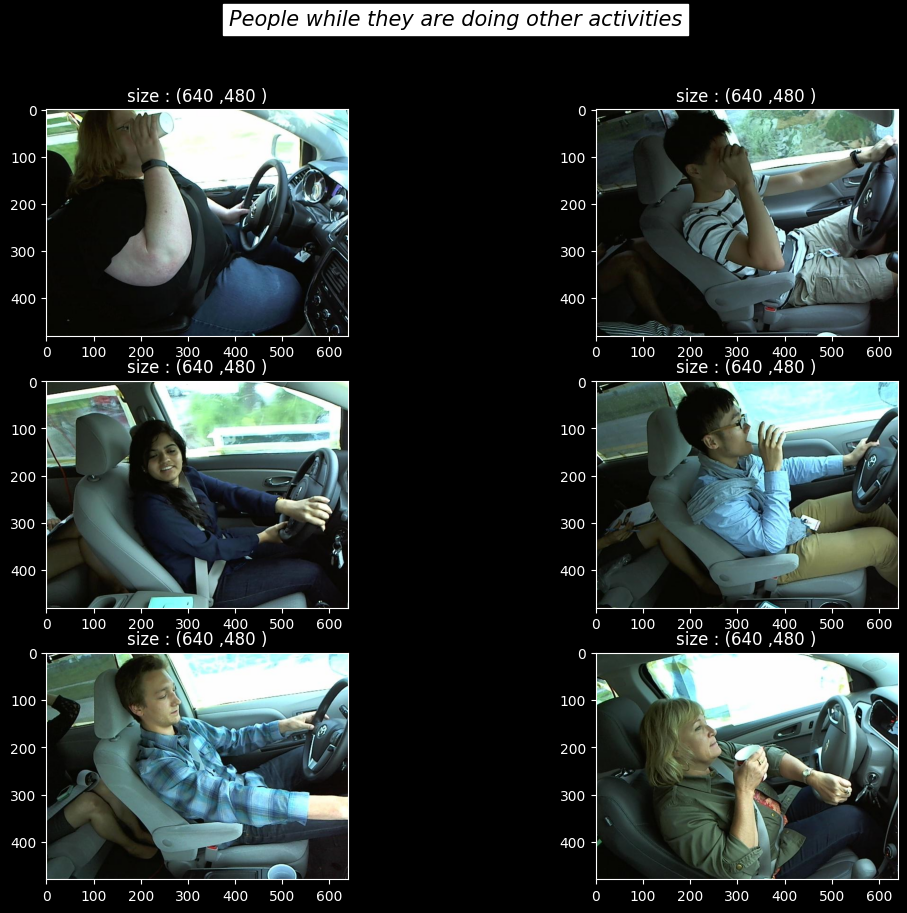

In [11]:
show_images(path = other_activities_img , seed = 42 , kind='People while they are doing other activities' )


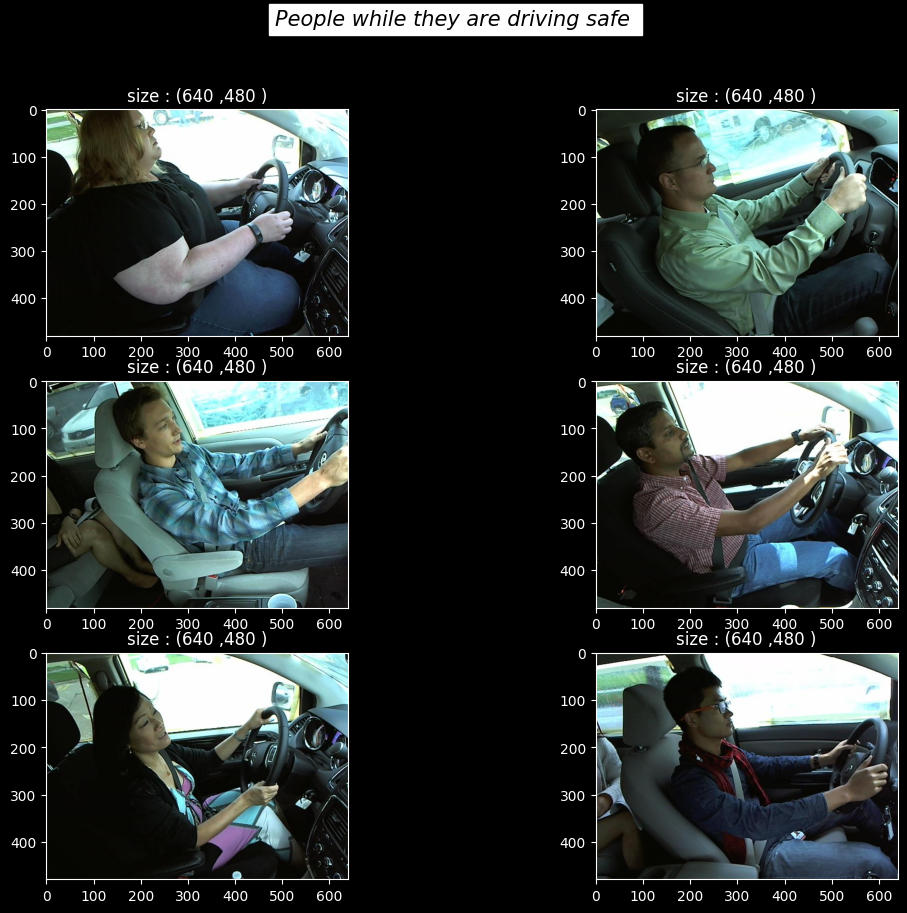

In [12]:
show_images(path = safe_driving_img , seed = 42 , kind='People while they are driving safe ' )


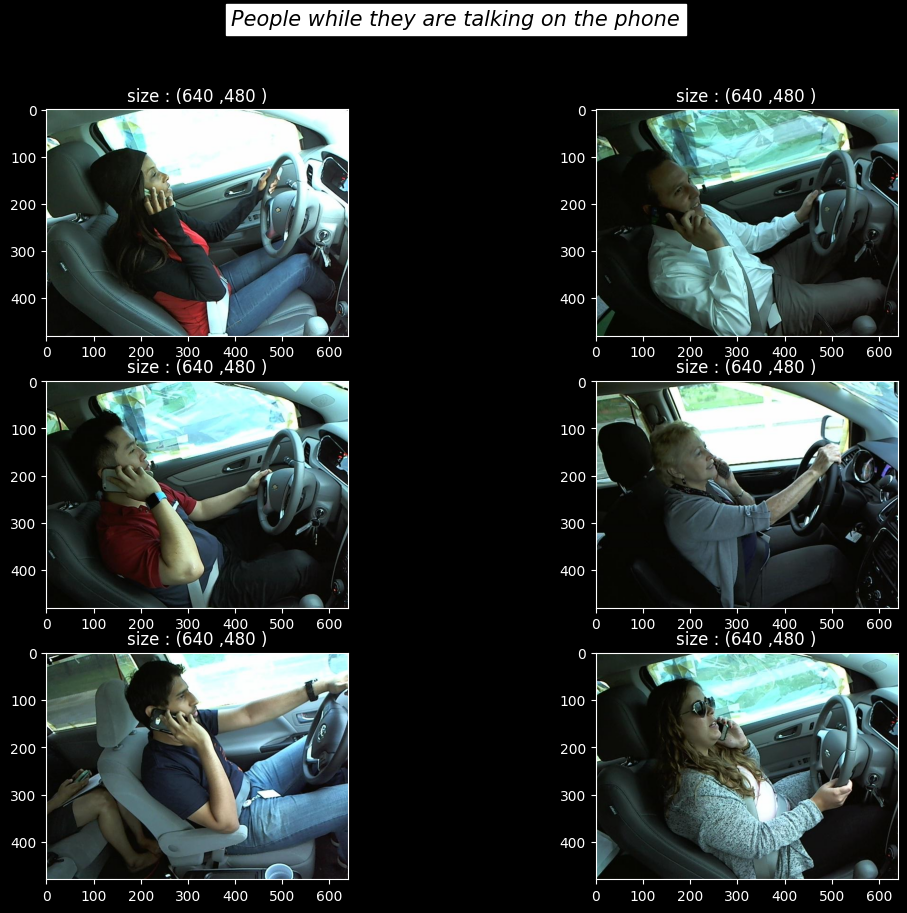

In [13]:
show_images(path = talking_phone_img , seed = 42 , kind='People while they are talking on the phone' )


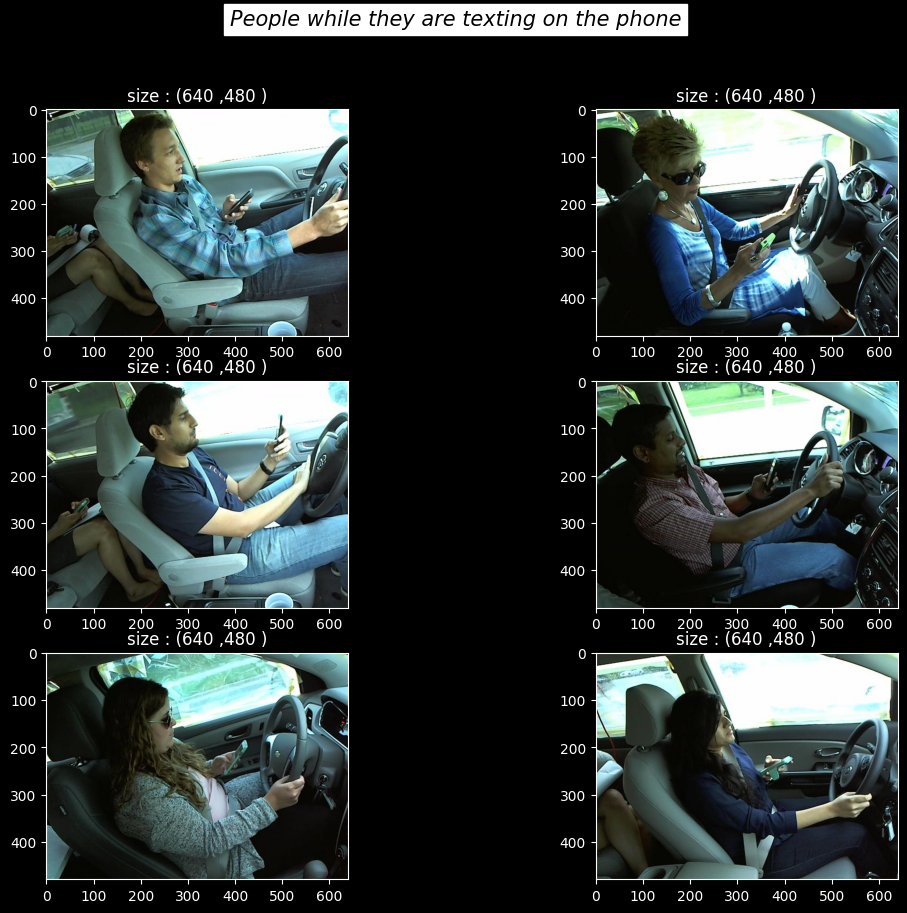

In [14]:
show_images(path = texting_phone_img , seed = 42 , kind='People while they are texting on the phone' )


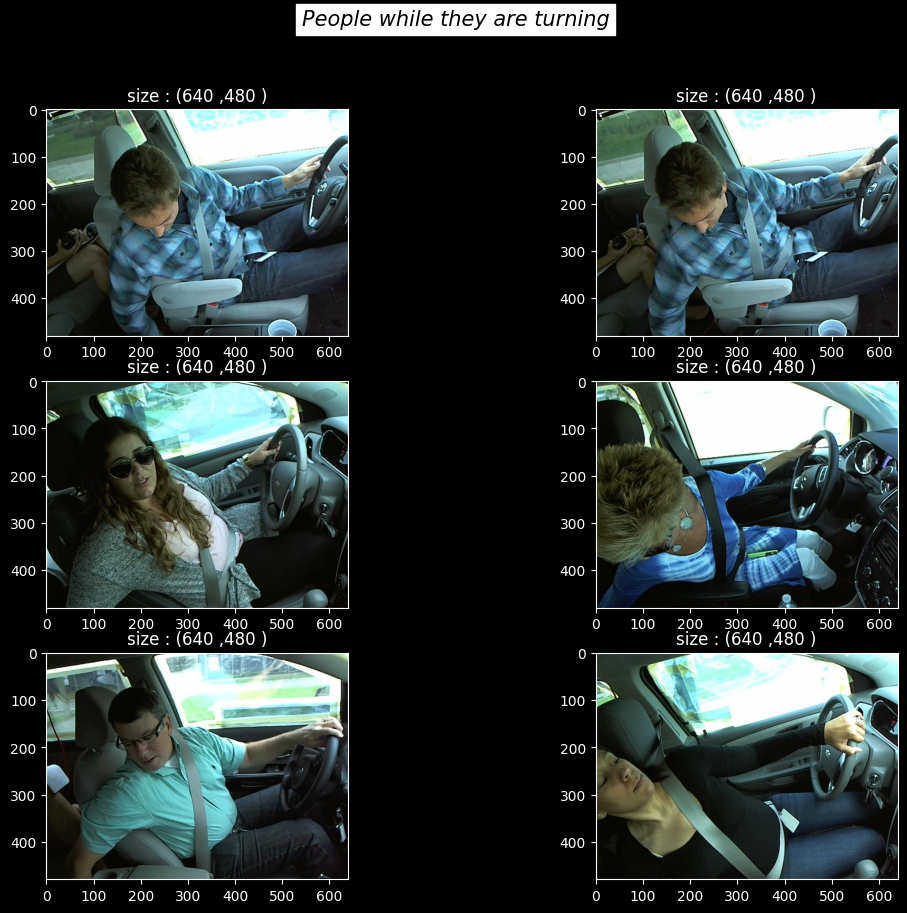

In [15]:
show_images(path = turning_img , seed = 42 , kind='People while they are turning' )


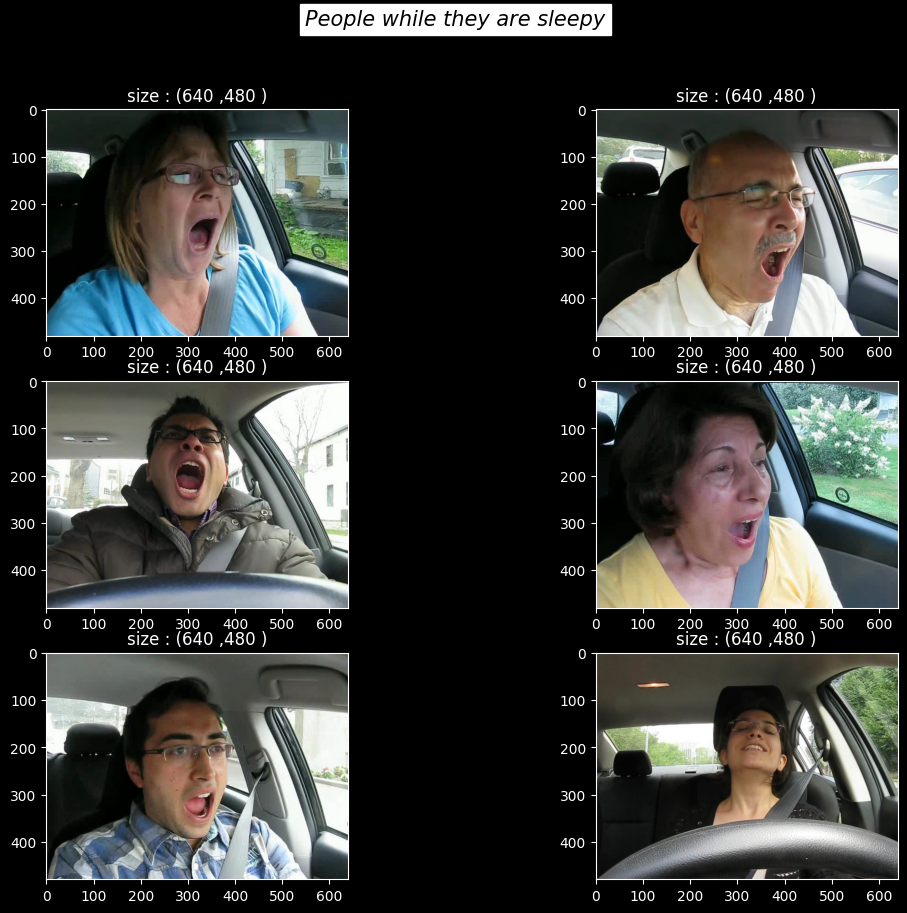

In [16]:
show_images(path = sleepy_img , seed = 42 , kind='People while they are sleepy' )


In [18]:
train_other_activities  ,  test_other_activities   , valid_other_activities= [] , [] ,[]


train_drive_safe ,  test_drive_safe  , valid_drive_safe = [] , [] ,[]


train_talking  ,  test_talking   , valid_talking = [] , [] , []


train_texting  ,  test_texting   , valid_texting= [] , [] ,[]

 
train_turning  ,  test_turning   , valid_turning= [] , [] ,[]

train_sleepy  ,  test_sleepy   , valid_sleepy= [] , [] ,[]

def train_test_validation(data , Train , Test , Valid , Name ):
    
    Len = len(data)
    train_num = int( Len * 0.80)
    test_num = int(Len * 0.10)
    valid_num = int(Len * 0.10)
    
    n_t = train_num + test_num
    Train.extend(data[:train_num])
    Test.extend(data[train_num : n_t])
    Valid.extend(data[n_t :])
   

 

    print(f'Name : {Name}')
    print(f'Number of all images : {Len}')
    print(f'Train(80%) : {len(Train)}')
    print(f'Test(10%) :{len(Test)}')
    print(f'Valid(10%) : {len(Valid)}')

In [19]:
train_test_validation(data = other_activities_img , Train=train_other_activities , Test=test_other_activities , Valid=valid_other_activities , Name='Other_activities')


Name : Other_activities
Number of all images : 2142
Train(80%) : 1713
Test(10%) :214
Valid(10%) : 215


In [20]:
train_test_validation(data = safe_driving_img , Train=train_drive_safe , Test=test_drive_safe , Valid=valid_drive_safe , Name='Driving safe')


Name : Driving safe
Number of all images : 2227
Train(80%) : 1781
Test(10%) :222
Valid(10%) : 224


In [21]:
train_test_validation(data = talking_phone_img, Train=train_talking , Test=test_talking , Valid=valid_talking, Name='Talking on the phone')


Name : Talking on the phone
Number of all images : 2193
Train(80%) : 1754
Test(10%) :219
Valid(10%) : 220


In [22]:
train_test_validation(data = texting_phone_img , Train=train_texting , Test=test_texting , Valid=valid_texting , Name='Texting on the phone')


Name : Texting on the phone
Number of all images : 2217
Train(80%) : 1773
Test(10%) :221
Valid(10%) : 223


In [23]:
train_test_validation(data = turning_img , Train=train_turning , Test=test_turning , Valid=valid_turning , Name='Turning')


Name : Turning
Number of all images : 2124
Train(80%) : 1699
Test(10%) :212
Valid(10%) : 213


In [24]:
train_test_validation(data = sleepy_img , Train=train_sleepy , Test=test_sleepy , Valid=valid_sleepy , Name='Feeling Sleepy while Driving')


Name : Feeling Sleepy while Driving
Number of all images : 2328
Train(80%) : 1862
Test(10%) :232
Valid(10%) : 234


In [25]:
Train_Other_DataFrame = pd.DataFrame({'Img' : train_other_activities , 'Label' : 'Other activities'})
Train_Drive_Safe_DataFrame = pd.DataFrame({'Img' : train_drive_safe , 'Label' : 'Drive safe'})
Train_Talking_DataFrame = pd.DataFrame({'Img' : train_talking , 'Label' : 'Talking'})
Train_Texting_DataFrame = pd.DataFrame({'Img' : train_texting , 'Label' : 'Texting'})
Train_Turning_DataFrame = pd.DataFrame({'Img' : train_turning , 'Label' : 'Turning'})
Train_Sleepy_DataFrame = pd.DataFrame({'Img' : train_sleepy , 'Label' : 'Sleepy'})

#--------------------------------------------------------Train DF

Test_Other_DataFrame = pd.DataFrame({'Img' : test_other_activities , 'Label' : 'Other activities'})
Test_Drive_Safe_DataFrame = pd.DataFrame({'Img' : test_drive_safe , 'Label' : 'Drive safe'})
Test_Talking_DataFrame = pd.DataFrame({'Img' : test_talking , 'Label' : 'Talking'})
Test_Texting_DataFrame = pd.DataFrame({'Img' : test_texting , 'Label' : 'Texting'})
Test_Turning_DataFrame = pd.DataFrame({'Img' : test_turning ,  'Label' : 'Turning'})
Test_Sleepy_DataFrame = pd.DataFrame({'Img' : test_sleepy ,  'Label' : 'Sleepy'})

#---------------------------------------------------------Test DF

Valid_Other_DataFrame = pd.DataFrame({'Img' : valid_other_activities , 'Label' : 'Other activities'})
Valid_Drive_Safe_DataFrame = pd.DataFrame({'Img' : valid_drive_safe , 'Label' : 'Drive safe'})
Valid_Talking_DataFrame = pd.DataFrame({'Img' : valid_talking , 'Label' : 'Talking'})
Valid_Texting_DataFrame = pd.DataFrame({'Img' : valid_texting , 'Label' : 'Texting'})
Valid_Turning_DataFrame = pd.DataFrame({'Img' : valid_turning , 'Label' : 'Turning'})
Valid_Sleepy_DataFrame = pd.DataFrame({'Img' : valid_sleepy , 'Label' : 'Sleepy'})

In [26]:
Train_df_all = pd.concat([Train_Other_DataFrame , Train_Drive_Safe_DataFrame , Train_Talking_DataFrame , Train_Texting_DataFrame , Train_Turning_DataFrame,Train_Sleepy_DataFrame])
Test_df_all = pd.concat([Test_Other_DataFrame , Test_Drive_Safe_DataFrame , Test_Talking_DataFrame , Test_Texting_DataFrame , Test_Turning_DataFrame, Test_Sleepy_DataFrame])
Valid_df_all = pd.concat([Valid_Other_DataFrame , Valid_Drive_Safe_DataFrame , Valid_Talking_DataFrame , Valid_Texting_DataFrame , Valid_Turning_DataFrame, Valid_Sleepy_DataFrame])

In [27]:
print(f'The shape of Train DataFrame is : {Train_df_all.shape}')
print(f'The shape of Test DataFrame is : {Test_df_all.shape}')
print(f'The shape of Valid DataFrame is : {Valid_df_all.shape}')

The shape of Train DataFrame is : (10582, 2)
The shape of Test DataFrame is : (1320, 2)
The shape of Valid DataFrame is : (1329, 2)


In [28]:
from PIL import Image

def convert_to_rgb_jpeg_in_writable_dir(dataframe, img_column, root_dir):
    for idx, row in dataframe.iterrows():
        img_path = os.path.join(root_dir, row[img_column])
        try:
            with Image.open(img_path) as img:
                if img.mode != 'RGB' or not img_path.endswith('.jpg'):
                    # Convert to RGB and save as JPEG
                    rgb_img = img.convert('RGB')
                    new_img_path = os.path.splitext(img_path)[0] + '.jpg'
                    rgb_img.save(new_img_path, 'JPEG')
                    dataframe.at[idx, img_column] = new_img_path  # Update path in dataframe
                    os.remove(img_path)  # Remove the original file
                    print(f"Converted {img_path} to {new_img_path}")
        except Exception as e:
            print(f"Error converting {img_path}: {e}")

# Update the paths in the dataframe to point to the new writable directory
Train_df_all['Img'] = Train_df_all['Img'].apply(lambda x: os.path.join(dst_dir, os.path.relpath(x, src_dir)))
Valid_df_all['Img'] = Valid_df_all['Img'].apply(lambda x: os.path.join(dst_dir, os.path.relpath(x, src_dir)))
Test_df_all['Img'] = Test_df_all['Img'].apply(lambda x: os.path.join(dst_dir, os.path.relpath(x, src_dir)))
# Apply the conversion to each dataframe
convert_to_rgb_jpeg_in_writable_dir(Train_df_all, 'Img', dst_dir)
convert_to_rgb_jpeg_in_writable_dir(Valid_df_all, 'Img', dst_dir)
convert_to_rgb_jpeg_in_writable_dir(Test_df_all, 'Img', dst_dir)

Converted /kaggle/working/Revitsone-5classes/other_activities/2019-04-2416-46-55.png to /kaggle/working/Revitsone-5classes/other_activities/2019-04-2416-46-55.jpg
Converted /kaggle/working/Revitsone-5classes/other_activities/2019-04-2417-06-26.png to /kaggle/working/Revitsone-5classes/other_activities/2019-04-2417-06-26.jpg
Converted /kaggle/working/Revitsone-5classes/other_activities/2019-04-2416-08-22.png to /kaggle/working/Revitsone-5classes/other_activities/2019-04-2416-08-22.jpg
Converted /kaggle/working/Revitsone-5classes/other_activities/2019-04-2417-14-45.png to /kaggle/working/Revitsone-5classes/other_activities/2019-04-2417-14-45.jpg
Converted /kaggle/working/Revitsone-5classes/other_activities/2019-04-2416-37-15.png to /kaggle/working/Revitsone-5classes/other_activities/2019-04-2416-37-15.jpg
Converted /kaggle/working/Revitsone-5classes/other_activities/2019-04-2416-08-09.png to /kaggle/working/Revitsone-5classes/other_activities/2019-04-2416-08-09.jpg
Converted /kaggle/work

In [29]:
from PIL import Image
import os

def filter_invalid_images(dataframe, img_column):
    valid_rows = []
    invalid_files = []
    for idx, row in dataframe.iterrows():
        img_path = row[img_column]
        try:
            with Image.open(img_path) as img:
                img.verify()  # Verify if it’s a valid image
            valid_rows.append(row)  # Add valid row to the list
        except (IOError, SyntaxError, ValueError) as e:
            print(f"Invalid image file: {img_path}")
            invalid_files.append(img_path)

    # Rebuild the dataframe with only valid images
    return pd.DataFrame(valid_rows), invalid_files

# Apply to each dataframe (training, validation, and test)
Train_df_all, invalid_train_files = filter_invalid_images(Train_df_all, 'Img')
Valid_df_all, invalid_valid_files = filter_invalid_images(Valid_df_all, 'Img')
Test_df_all, invalid_test_files = filter_invalid_images(Test_df_all, 'Img')

# Display any invalid files found
print("Invalid files in training set:", invalid_train_files)
print("Invalid files in validation set:", invalid_valid_files)
print("Invalid files in test set:", invalid_test_files)

Invalid image file: /kaggle/working/Revitsone-5classes/other_activities/img_13625.jpg
Invalid image file: /kaggle/working/Revitsone-5classes/other_activities/img_20398.jpg
Invalid image file: /kaggle/working/Revitsone-5classes/turning/img_67523.jpg
Invalid image file: /kaggle/working/Revitsone-5classes/turning/img_101434.jpg
Invalid image file: /kaggle/working/Revitsone-5classes/turning/img_62337.jpg
Invalid image file: /kaggle/working/Revitsone-5classes/turning/img_8771.jpg
Invalid image file: /kaggle/working/Revitsone-5classes/turning/img_84605.jpg
Invalid image file: /kaggle/working/Revitsone-5classes/turning/img_70552.jpg
Invalid files in training set: ['/kaggle/working/Revitsone-5classes/other_activities/img_13625.jpg', '/kaggle/working/Revitsone-5classes/other_activities/img_20398.jpg', '/kaggle/working/Revitsone-5classes/turning/img_67523.jpg', '/kaggle/working/Revitsone-5classes/turning/img_101434.jpg', '/kaggle/working/Revitsone-5classes/turning/img_62337.jpg', '/kaggle/workin

In [30]:
Driver_behaviour_classes = ['Drive safe' , 'Other activities' , 'Talking' , 'Texting' ,'Turning', 'Sleepy']


In [31]:
Driver_behaviour_classes


['Drive safe', 'Other activities', 'Talking', 'Texting', 'Turning', 'Sleepy']

In [32]:
Train_df_all


Img             Label
0     /kaggle/working/Revitsone-5classes/other_activ...  Other activities
1     /kaggle/working/Revitsone-5classes/other_activ...  Other activities
2     /kaggle/working/Revitsone-5classes/other_activ...  Other activities
3     /kaggle/working/Revitsone-5classes/other_activ...  Other activities
4     /kaggle/working/Revitsone-5classes/other_activ...  Other activities
...                                                 ...               ...
1857  /kaggle/working/Revitsone-5classes/sleepy/img9...            Sleepy
1858  /kaggle/working/Revitsone-5classes/sleepy/img9...            Sleepy
1859  /kaggle/working/Revitsone-5classes/sleepy/img1...            Sleepy
1860  /kaggle/working/Revitsone-5classes/sleepy/img1...            Sleepy
1861  /kaggle/working/Revitsone-5classes/sleepy/img3...            Sleepy

[10575 rows x 2 columns]

In [33]:
Train_Image_Data_Generator = ImageDataGenerator(rescale=1./255.)
Test_Image_Data_Generator = ImageDataGenerator(rescale=1./255.)
Valid_Image_Data_Generator = ImageDataGenerator(rescale=1./255.)

In [34]:
num_classes = 6
batch_size = 16
img_size = 240 

In [35]:
def show_accuracy(Train_acc , Val_acc , epoch_num , model):
    plt.style.use('dark_background')
    plt.figure(figsize=(10 , 5))
    plt.plot(epoch_num, Train_acc, '--bo', color= 'white')
    plt.plot(epoch_num, Val_acc, '--bo',color= 'blue', linewidth = '2.5', label='line with marker')
    plt.legend(['Training Acc', 'Val Acc'])
    plt.title(f'Train & Val Accuracy in {model}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1,7,1))
    plt.show()

In [36]:
def show_loss(Train_loss , Val_loss , epoch_num , model):
    plt.style.use('dark_background')
    plt.figure(figsize=(10 , 5))
    plt.plot(epoch_num, Train_loss, '--bo',linewidth = '1.5', color= 'white')
    plt.plot(epoch_num, Val_loss, '--bo',color= 'blue', linewidth = '1.5', label='line with marker')
    plt.legend(['Training Loss', 'Val Loss'])
    plt.title(f'Train & Val Loss in {model}')
    plt.xlabel('Epoch' , c='b')
    plt.ylabel('Accuracy', c='b')
    plt.xticks(np.arange(1,7,1))
    plt.show()

Model Training - Unet EfficientNetB7

In [37]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Define U-Net with EfficientNetB7 backbone for classification
def unet_efficientnetb7_classification(input_shape=(img_size, img_size, 3), num_classes=num_classes):
    base_model = EfficientNetB7(weights="imagenet", include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Global pooling to reduce to (None, features)
    outputs = Dense(num_classes, activation="softmax")(x)  # Final classification layer

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

In [39]:
# Instantiate and compile model
model = unet_efficientnetb7_classification()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
model.summary()


In [40]:
# Initialize the data loaders with cleaned dataframes
Train_loader = Train_Image_Data_Generator.flow_from_dataframe(
    dataframe=Train_df_all,
    x_col='Img',
    y_col='Label',
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(img_size, img_size),
    shuffle=True,
    seed=42
)

Valid_loader = Valid_Image_Data_Generator.flow_from_dataframe(
    dataframe=Valid_df_all,
    x_col='Img',
    y_col='Label',
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(img_size, img_size),
    shuffle=True,
    seed=42
)

Test_loader = Test_Image_Data_Generator.flow_from_dataframe(
    dataframe=Test_df_all,
    x_col='Img',
    y_col='Label',
    class_mode='categorical',  # Use 'None' if labels are unavailable
    batch_size=batch_size,
    target_size=(img_size, img_size),
    shuffle=False
)

Found 10575 validated image filenames belonging to 6 classes.
Found 1329 validated image filenames belonging to 6 classes.
Found 1319 validated image filenames belonging to 6 classes.


In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint callback to save the best model based on validation accuracy
checkpoint_callback = ModelCheckpoint(
    filepath='/kaggle/working/best_model2_e7.keras',  # Updated to use `.keras` extension
    monitor='val_accuracy',                      # Metric to monitor
    mode='max',                                  # Mode 'max' because we want to maximize validation accuracy
    save_best_only=True,                         # Save only the best model
    verbose=1                                    # Print a message when saving the best model
)


In [43]:
epochs = 10
history = model.fit(
    Train_loader,
    epochs=epochs,
    validation_data=Valid_loader,
    callbacks=[checkpoint_callback]  # Pass the callback here
)

Epoch 1/10


I0000 00:00:1733011246.171219     100 service.cc:145] XLA service 0x7f3300005800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733011246.171284     100 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1733011534.216399     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.7643 - loss: 0.6578
Epoch 1: val_accuracy improved from -inf to 0.89842, saving model to /kaggle/working/best_model2_e7.keras
661/661 ━━━━━━━━━━━━━━━━━━━━ 972s 872ms/step - accuracy: 0.7644 - loss: 0.6575 - val_accuracy: 0.8984 - val_loss: 0.3434
Epoch 2/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.9014 - loss: 0.2672
Epoch 2: val_accuracy improved from 0.89842 to 0.93153, saving model to /kaggle/working/best_model2_e7.keras
661/661 ━━━━━━━━━━━━━━━━━━━━ 284s 429ms/step - accuracy: 0.9014 - loss: 0.2672 - val_accuracy: 0.9315 - val_loss: 0.1989
Epoch 3/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.9116 - loss: 0.2353
Epoch 3: val_accuracy did not improve from 0.93153
661/661 ━━━━━━━━━━━━━━━━━━━━ 279s 421ms/step - accuracy: 0.9116 - loss: 0.2353 - val_accuracy: 0.8390 - val_loss: 0.6756
Epoch 4/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.9078 - loss: 0.2263
Epoch 4: val_accuracy did not 

83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.8858 - loss: 0.2597
Test Loss: 0.2251
Test Accuracy: 0.9105
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step

Classification Report:

                  precision    recall  f1-score   support

      Drive safe       0.98      0.90      0.93       222
Other activities       0.98      0.86      0.92       214
          Sleepy       1.00      0.92      0.96       232
         Talking       0.99      0.90      0.94       219
         Texting       0.99      0.90      0.94       221
         Turning       0.66      0.99      0.79       211

        accuracy                           0.91      1319
       macro avg       0.93      0.91      0.91      1319
    weighted avg       0.94      0.91      0.92      1319



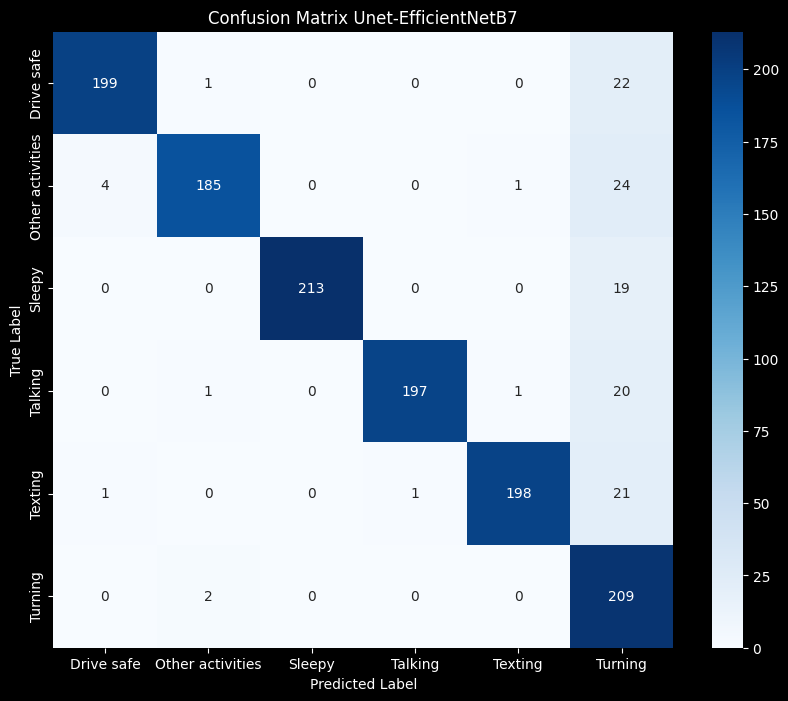

In [45]:
#Use best_model_e7.keras
# Import necessary libraries
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test loader
test_loss, test_accuracy = model.evaluate(Test_loader)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test loader
predictions = model.predict(Test_loader, verbose=1)

# Get true labels from the test loader
true_labels = Test_loader.classes

# Get predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Get class labels (map indices back to class names)
class_indices = Test_loader.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Invert mapping
predicted_labels = [class_labels[idx] for idx in predicted_class_indices]
true_labels_text = [class_labels[idx] for idx in true_labels]

# Print classification report
print("\nClassification Report:\n")
print(classification_report(true_labels, predicted_class_indices, target_names=class_labels.values()))

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_class_indices)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title("Confusion Matrix Unet-EfficientNetB7")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
